In [2]:
import pandas as pd
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm

#text/NLP 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.metrics import (confusion_matrix, plot_confusion_matrix,
    accuracy_score, plot_roc_curve, roc_auc_score, recall_score,
    precision_score, roc_curve, auc)
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_lyrics.csv')
df.head(1)

,id,track,artist,lyrics,genre,cleaned_lyrics,title_length,lines,sections,verse_count,...,emot_anger,emot_trust,emot_disgust,emot_fear,emot_joy,emot_surprise,emot_anticp,track_lower,lyrics_lower,lyrics_contain_title
0,6qc34bnVOyqGDPni8H5W0U,Amazed,Lonestar,[Verse 1]\nEvery time our eyes meet\nThis feel...,country,Every time our eyes meet This feeling inside ...,6,55,6,2,...,0.052632,0.026316,0.052632,0.052632,0.157895,0.052632,0.0,amazed,every time our eyes meet this feeling inside ...,True


In [5]:
X = df['cleaned_lyrics']
y = df['genre']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [7]:
y_train.value_counts(normalize=True)

rock         0.296751
dance_pop    0.283032
hip_hop      0.253430
country      0.166787
Name: genre, dtype: float64

In [8]:
def get_metrics(model_name, model, X, y):
    labels = ['country','dance_pop','hip_hop','rock']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    train_score = model.score(X_train,y_train)

    #storing results
    data = confusion_matrix(y_test, preds)
    results = {labels[i] : data[i][i]/sum(data[i]) for i in range(0, len(data))}
    result_df = pd.DataFrame(results, index=[0])
    result_df['model'] = model_name
    result_df['train_accuracy'] = train_score
    result_df['accuracy'] = model.score(X_test,y_test)
    return result_df[['model','train_accuracy','accuracy'] + labels]

In [9]:
pipe_cv_svm = Pipeline([
    ('cv',CountVectorizer()),
    ('svm', svm.SVC(C=1.0, kernel='linear', random_state=42))]
)

pipe_cv_svm.fit(X_train,y_train)
pipe_cv_svm.score(X_train,y_train), pipe_cv_svm.score(X_test,y_test)

(0.9978339350180505, 0.6507936507936508)

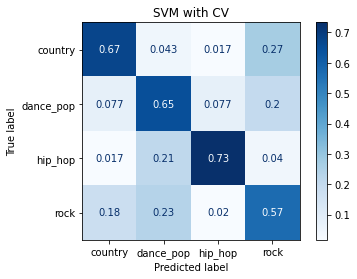

In [10]:
ConfusionMatrixDisplay.from_estimator(pipe_cv_svm, X_test, y_test, cmap="Blues", normalize='true')
plt.title("SVM with CV");

In [11]:
get_metrics("SVM with CountVectorizer", pipe_cv_svm, X, y)

,model,train_accuracy,accuracy,country,dance_pop,hip_hop,rock
0,SVM with CountVectorizer,0.997834,0.650794,0.672414,0.647959,0.732955,0.570732
